# Análisis de compsición de simbolos para S1

In [5]:
import sources
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")

In [13]:
pickle_path = '../data/palbi_capture_eth_S1.pkl'
def importPkl(route):
    # DEPREC: Function to import the pkl generated through sources.py, and calculate infos,probas and entropy
    # Import pkl for S1
    S1 = sources.load_source(route)
#     infos = sources.informacion_por_sim
#     bolo(S1)
#     probas = sources.proba_por_simbolo(S1)
#     entropy = sources.entropy(S1)
    return S1

In [17]:
def plotPacketsSymbolsPercentage(S1):
    # Plot both pie plot with packets capture composition in each of the corresponding symbols
    fig1, axarr = plt.subplots(1, 2, figsize=(15, 6))
    
    broadcast = sum([v for k, v in S1.items() if 'broadcast' in k])
    unicast = sum([v for k, v in S1.items() if 'unicast' in k])
    labels = 'Broadcast', 'Unicast y Multicast'
    sizes = [broadcast, unicast]
    
    # Broadcast over unicast/multicast packets
    axarr[0].pie(sizes,autopct='%1.4f%%',shadow=True, startangle=90)
    axarr[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axarr[0].set_title('Porcentaje de trafico broadcast sobre el trafico total')
    handles = []
    axarr[0].legend(labels, bbox_to_anchor=(0.85,1), loc="upper left")
    
    # Packets divided in layer 2 protocols
    labels, sizes = map(list, zip(*S1.items()))
    labels = list(map(lambda s: s.replace('\n', '-'),labels))
    percents = list(map(lambda x: x/sum(sizes),sizes))
    labels = [labels[i]+"\n%.4f %%"%(percents[i]) for i in range(len(sizes))]
    axarr[1].pie(sizes, startangle=90)
    axarr[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axarr[1].set_title('Porcentaje de trafico para cada simbolo')
    axarr[1].legend(labels, bbox_to_anchor=(0.93,1.025), loc="upper left")
    
    plt.show()

## Capturas y sus correspondientes plots

Acá podría empezar a escribir algo del análisis en general...

In [11]:
# PKL generados de los pcap
pkl_nic = "../data/starb_juramento_S1.pkl"
pkl_juab = "../data/juab_ofi_S1.pkl"
pkl_nico = "../data/nico_labos_S1.pkl"
pkl_pablo = "../data/palbi_capture_eth_S1.pkl"

### Nic - Starbucks

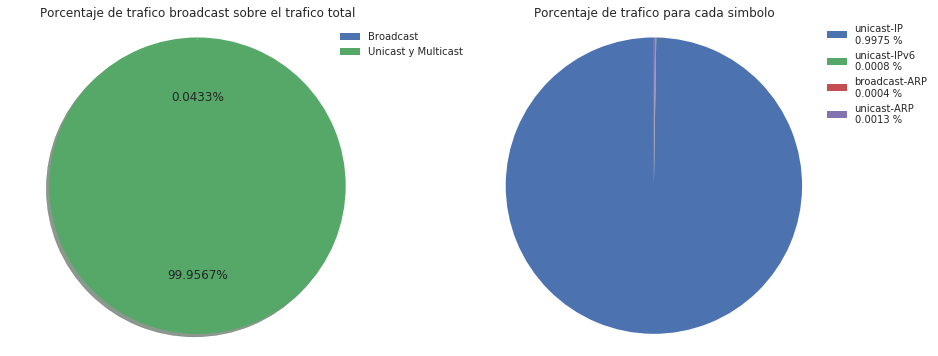

In [18]:
plotPacketsSymbolsPercentage(importPkl(pkl_nic))

### Juab - Oficina

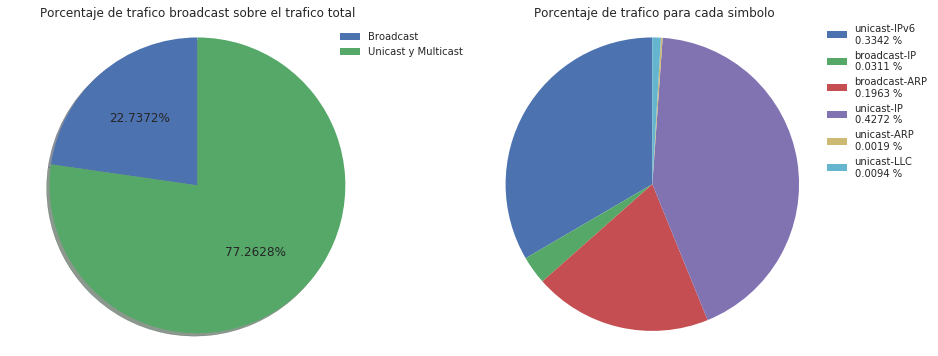

In [19]:
plotPacketsSymbolsPercentage(importPkl(pkl_juab))

### Nico - Labos

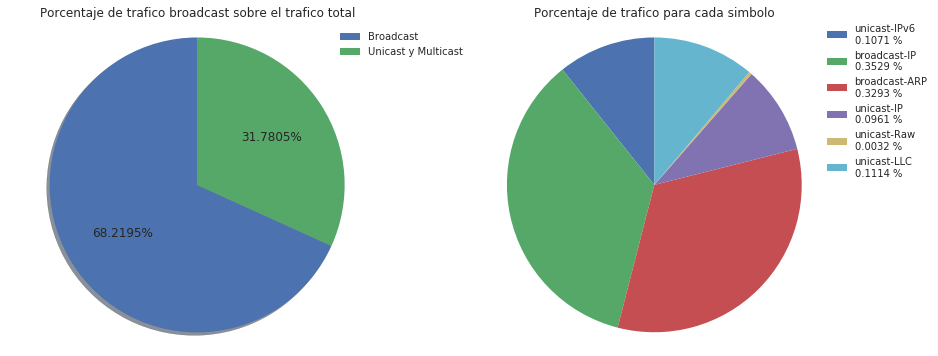

In [20]:
plotPacketsSymbolsPercentage(importPkl(pkl_nico))

### Pablo - Ethernet hogareño

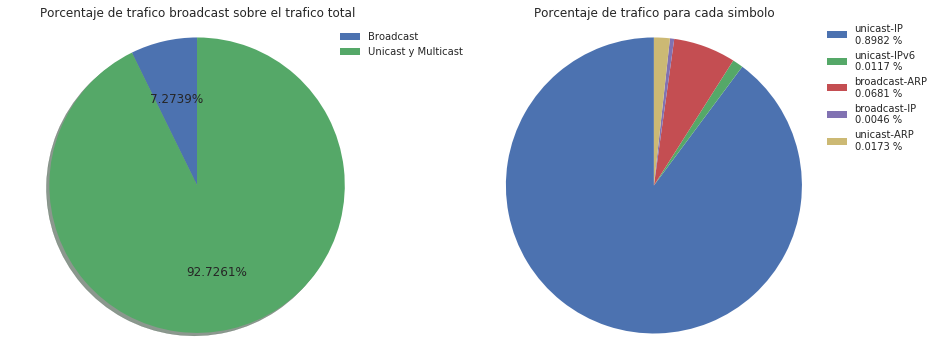

In [21]:
plotPacketsSymbolsPercentage(importPkl(pkl_pablo))